In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv('datas/train.csv')
test_df = pd.read_csv('datas/test.csv')

In [3]:
train_df.isnull().sum(), test_df.isnull().sum()

(datetime      0
 season        0
 holiday       0
 workingday    0
 weather       0
 temp          0
 atemp         0
 humidity      0
 windspeed     0
 casual        0
 registered    0
 count         0
 dtype: int64,
 datetime      0
 season        0
 holiday       0
 workingday    0
 weather       0
 temp          0
 atemp         0
 humidity      0
 windspeed     0
 dtype: int64)

In [4]:
train_df.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.00,0.03,-0.01,0.01,0.26,0.26,0.19,-0.15,0.10,0.16,0.16
holiday,0.03,1.00,-0.25,-0.01,0.00,-0.01,0.00,0.01,0.04,-0.02,-0.01
workingday,-0.01,-0.25,1.00,0.03,0.03,0.02,-0.01,0.01,-0.32,0.12,0.01
weather,0.01,-0.01,0.03,1.00,-0.06,-0.06,0.41,0.01,-0.14,-0.11,-0.13
temp,0.26,0.00,0.03,-0.06,1.00,0.98,-0.06,-0.02,0.47,0.32,0.39
atemp,0.26,-0.01,0.02,-0.06,0.98,1.00,-0.04,-0.06,0.46,0.31,0.39
humidity,0.19,0.00,-0.01,0.41,-0.06,-0.04,1.00,-0.32,-0.35,-0.27,-0.32
windspeed,-0.15,0.01,0.01,0.01,-0.02,-0.06,-0.32,1.00,0.09,0.09,0.10
casual,0.10,0.04,-0.32,-0.14,0.47,0.46,-0.35,0.09,1.00,0.50,0.69
registered,0.16,-0.02,0.12,-0.11,0.32,0.31,-0.27,0.09,0.50,1.00,0.97


<AxesSubplot:xlabel='humidity', ylabel='count'>

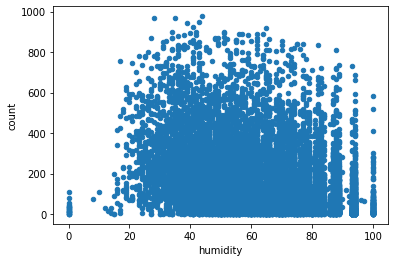

In [5]:
train_df.plot.scatter(x='humidity', y='count')

<AxesSubplot:xlabel='humidity'>

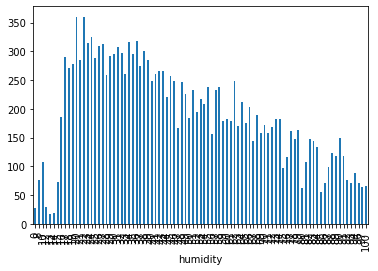

In [6]:
train_df.groupby('humidity')['count'].mean().plot.bar()

<AxesSubplot:xlabel='season'>

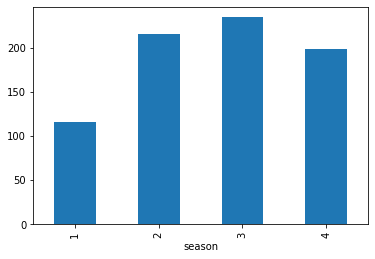

In [7]:
train_df.groupby('season')['count'].mean().plot.bar()

<AxesSubplot:ylabel='Density'>

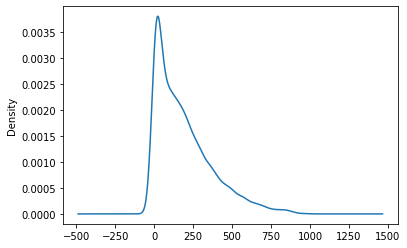

In [8]:
train_df['count'].plot.kde()

<AxesSubplot:ylabel='Density'>

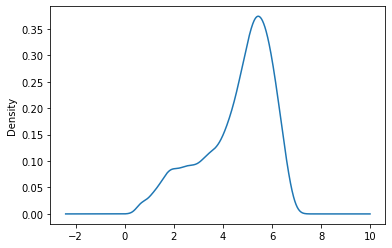

In [9]:
np.log(train_df['count'] + 1).plot.kde()

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<AxesSubplot:xlabel='holiday'>

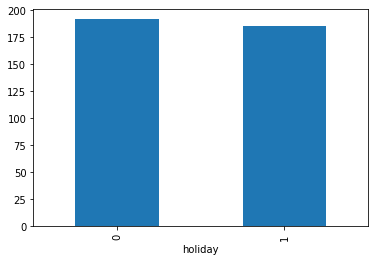

In [11]:
train_df.groupby('holiday')['count'].mean().plot.bar()

<AxesSubplot:xlabel='workingday'>

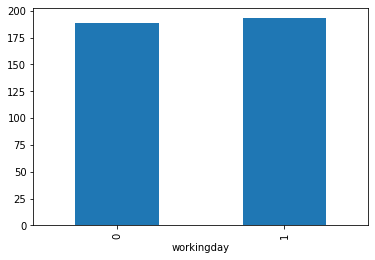

In [12]:
train_df.groupby('workingday')['count'].mean().plot.bar()

<AxesSubplot:xlabel='weather'>

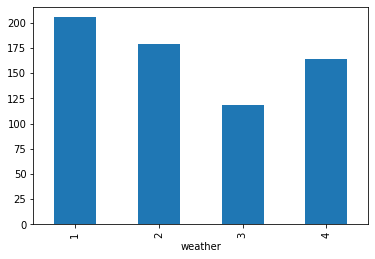

In [13]:
train_df.groupby('weather')['count'].mean().plot.bar()

<AxesSubplot:xlabel='temp'>

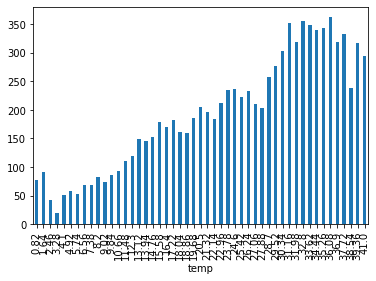

In [14]:
train_df.groupby("temp")['count'].mean().plot.bar()

<AxesSubplot:xlabel='atemp'>

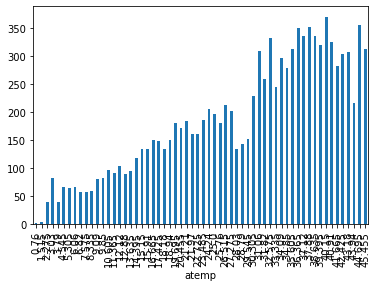

In [15]:
train_df.groupby("atemp")['count'].mean().plot.bar()

<AxesSubplot:xlabel='humidity'>

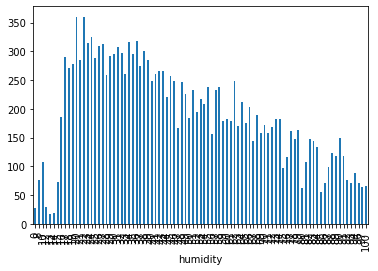

In [16]:
train_df.groupby("humidity")['count'].mean().plot.bar()

<AxesSubplot:xlabel='windspeed'>

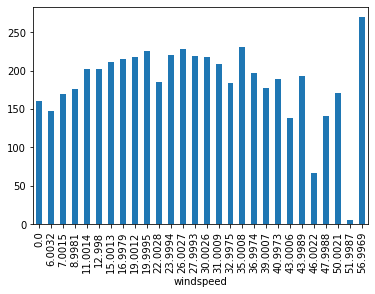

In [17]:
train_df.groupby("windspeed")['count'].mean().plot.bar()

In [18]:
df = pd.concat((train_df.drop(['casual', 'registered', 'count'], axis=1), test_df), axis=0, ignore_index=True)

# Processing Data

In [19]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df = df.drop(['datetime'], axis=1)

In [20]:
# df = df.drop(['temp'], axis=1)

In [21]:
show = pd.concat((df[:train_df.shape[0]], train_df[['count']]), axis=1)
show.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count
season,1.00,0.03,-0.01,0.01,0.26,0.26,0.19,-0.15,-0.00,0.97,0.00,-0.01,0.16
holiday,0.03,1.00,-0.25,-0.01,0.00,-0.01,0.00,0.01,0.01,0.00,-0.02,-0.00,-0.01
workingday,-0.01,-0.25,1.00,0.03,0.03,0.02,-0.01,0.01,-0.00,-0.00,0.01,0.00,0.01
weather,0.01,-0.01,0.03,1.00,-0.06,-0.06,0.41,0.01,-0.01,0.01,-0.01,-0.02,-0.13
temp,0.26,0.00,0.03,-0.06,1.00,0.98,-0.06,-0.02,0.06,0.26,0.02,0.15,0.39
atemp,0.26,-0.01,0.02,-0.06,0.98,1.00,-0.04,-0.06,0.06,0.26,0.01,0.14,0.39
humidity,0.19,0.00,-0.01,0.41,-0.06,-0.04,1.00,-0.32,-0.08,0.20,-0.01,-0.28,-0.32
windspeed,-0.15,0.01,0.01,0.01,-0.02,-0.06,-0.32,1.00,-0.02,-0.15,0.04,0.15,0.10
year,-0.00,0.01,-0.00,-0.01,0.06,0.06,-0.08,-0.02,1.00,-0.00,0.00,-0.00,0.26
month,0.97,0.00,-0.00,0.01,0.26,0.26,0.20,-0.15,-0.00,1.00,0.00,-0.01,0.17


In [22]:
# df = df.drop(['workingday', 'holiday'], axis=1)

In [23]:
df['humidity'] = df['humidity'] / 100.

In [24]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [25]:
df_wind_0 = df[df['windspeed'] == 0]
df_wind_not_0 = df[df['windspeed'] != 0]
df_wind_0.shape, df_wind_not_0.shape

((2180, 12), (15199, 12))

In [26]:
wind_X_train, wind_X_test, wind_y_train, wind_y_test = train_test_split(df_wind_not_0.drop(['windspeed', 'year'], axis=1), df_wind_not_0['windspeed'], test_size=0.2)

In [27]:
rfr = RandomForestRegressor()
rfr.fit(wind_X_train, wind_y_train)

RandomForestRegressor()

In [28]:
train_pred = rfr.predict(wind_X_train)
val_pred = rfr.predict(wind_X_test)
mean_squared_error(val_pred, wind_y_test), mean_squared_error(train_pred, wind_y_train)

(21.824481585595063, 3.096569689642919)

In [29]:
fill_wind_speed_zero = rfr.predict(df_wind_0.drop(['windspeed', 'year'], axis=1))

In [30]:
df.loc[df['windspeed']==0, 'windspeed'] = fill_wind_speed_zero

In [31]:
print(df[df['windspeed'] == 0])

Empty DataFrame
Columns: [season, holiday, workingday, weather, temp, atemp, humidity, windspeed, year, month, day, hour]
Index: []


# Train

In [32]:
train_data = df[:train_df.shape[0]]
test_data = df[train_df.shape[0]:].reset_index().drop(['index'], axis=1)

In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  float64
 7   windspeed   10886 non-null  float64
 8   year        10886 non-null  int64  
 9   month       10886 non-null  int64  
 10  day         10886 non-null  int64  
 11  hour        10886 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 1020.7 KB


# Outlier Removal

In [34]:
train_data = pd.concat((train_data, train_df[['count']]), axis=1)

In [35]:
c = 'humidity'
continuous_columns = ['atemp', 'humidity', 'windspeed']
for c in continuous_columns:
    q1 = train_data[c].quantile(0.25)
    q3 = train_data[c].quantile(0.75)
    iqr = q3 - q1
    low_thresh = q1 - iqr
    high_thresh = q3 + iqr
    to_remove = train_data[ (train_data[c] < low_thresh) | (train_data[c] > high_thresh) ].index
    train_data.drop(to_remove, axis=0, inplace=True)

# Train

In [36]:
target = train_data['count']
train_data = train_data.drop('count', axis=1)

X_train, X_val, y_train, y_val = train_test_split(train_data, target, test_size = 0.2)
log_y_train = np.log(y_train + 1)

In [37]:
gbr = GradientBoostingRegressor(
    n_estimators = 2000,
    learning_rate = 0.01,
    max_depth = 7,
    min_samples_split = 3,
    subsample = 0.8
)
gbr.fit(X_train, log_y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, min_samples_split=3,
                          n_estimators=2000, subsample=0.8)

In [38]:
train_pred = gbr.predict(X_train)
val_pred = gbr.predict(X_val)

In [39]:
train_pred = (np.exp(train_pred) - 1).astype(int)
val_pred = (np.exp(val_pred) - 1).astype(int)

In [40]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(val_pred, y_val)), np.sqrt(mean_squared_log_error(train_pred, y_train))

(0.29757238190394053, 0.126981342927578)

In [42]:
pred = gbr.predict(test_data)
pred = (np.exp(pred) - 1).astype(int)

In [47]:
submit = pd.DataFrame({'datetime': test_df['datetime'],
                      'count': pred})

In [50]:
submit.to_csv('outputs/full.csv', index=False)